In [969]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config
import importlib

In [970]:
importlib.reload(_config)

<module '_config' from 'e:\\GitHub\\Wasatch-Choice-Land-Use-And-Transit-Scenario\\_config.py'>

In [971]:
input_taz_shapefile_folder    = _config.input_taz_shapefile_folder
taz_shapefile                 = _config.taz_shapefile
se_years                      = _config.se_years
input_model_se_folder         = _config.input_model_se_folder
se_base_year                  = _config.se_base_year
df_centers                    = _config.df_centers
df_projects                   = _config.df_projects
hh_factor                     = _config.hh_factor
df_centers_county_multipliers = _config.df_centers_county_multipliers
use_county_multiplier         = _config.use_county_multiplier

# Read in data from previous notebooks

,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,geometry
0,Crossroads,City Center,Utah County,2496,49,165.490872,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,Crossroads,City Center,Utah County,2503,49,85.734122,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
2,Crossroads,City Center,Utah County,2504,49,146.410140,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4..."
3,Crossroads,City Center,Utah County,2505,49,76.823967,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4..."
4,Crossroads,City Center,Utah County,2498,49,112.631810,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4..."
...,...,...,...,...,...,...,...,...,...
1224,Meadowbrook Station,City Center,WFRC MPO,1492,35,45.728115,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4..."
1225,Meadowbrook Station,City Center,WFRC MPO,1493,35,50.633831,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705..."
1226,Meadowbrook Station,City Center,WFRC MPO,1494,35,50.381448,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4..."
1227,Meadowbrook Station,City Center,WFRC MPO,1495,35,88.369280,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4..."


<AxesSubplot:>

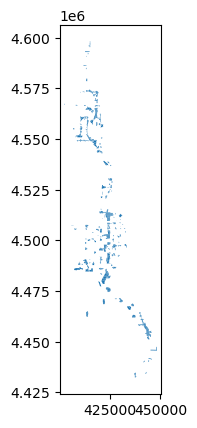

In [972]:
centers_taz_gdf = gpd.read_file("intermediate/centers-taz.geojson")
display(centers_taz_gdf)
centers_taz_gdf.plot()

In [973]:
centers_taz_gdf['CO_FIPS'].unique()

array([49, 11, 35, 57,  3], dtype=int64)

In [974]:
# read proportions from REMM data
df_percent_changeable = pd.read_csv('intermediate/percent-changeable.csv')
display(df_percent_changeable)
df_area_ratio_of_taz = pd.read_csv('intermediate/parameter-area-ratio-of-taz.csv')
display(df_area_ratio_of_taz)

,TAZID,AreaName,AreaType,pctu_ch
0,170.0,West Warren Center,Neighborhood Center,0.000000
1,171.0,West Warren Center,Neighborhood Center,0.000000
2,174.0,West Weber,Neighborhood Center,1.000000
3,175.0,West Weber,Neighborhood Center,0.747799
4,176.0,West 12th Street,Neighborhood Center,0.000000
...,...,...,...,...
1133,3388.0,Salem,Neighborhood Center,0.000000
1134,3394.0,Salem,Neighborhood Center,0.000000
1135,3405.0,Salem,Neighborhood Center,0.000000
1136,3406.0,Salem,Neighborhood Center,0.000000


,TAZID,AreaName,AreaType,TOTEMP,TOTHH
0,170.0,West Warren Center,Neighborhood Center,0.033064,0.015085
1,171.0,West Warren Center,Neighborhood Center,1.000000,0.008553
2,174.0,West Weber,Neighborhood Center,0.812660,0.063838
3,175.0,West Weber,Neighborhood Center,0.679508,0.061880
4,176.0,West 12th Street,Neighborhood Center,0.725612,0.226521
...,...,...,...,...,...
1097,3388.0,Salem,Neighborhood Center,0.000000,0.053695
1098,3394.0,Salem,Neighborhood Center,0.000000,0.220781
1099,3405.0,Salem,Neighborhood Center,0.000000,0.094746
1100,3406.0,Salem,Neighborhood Center,0.000000,0.168630


In [975]:
# join tables
centers_taz_gdf_changeable = pd.merge(centers_taz_gdf, df_percent_changeable, on=['AreaName','AreaType','TAZID'], how='left')
centers_taz_gdf_changeable_ratios = pd.merge(centers_taz_gdf_changeable, df_area_ratio_of_taz, on=['TAZID', 'AreaName', 'AreaType'], how='left')
centers_taz_gdf_changeable_ratios.fillna(0, inplace=True)
centers_taz_gdf_changeable_ratios = centers_taz_gdf_changeable_ratios.melt(id_vars=['AreaName','AreaType','TAZID','TAZACRES','CO_FIPS','sqm','acres','geometry','pctu_ch'],var_name='parameter',value_name='taz_ratio')
centers_taz_gdf_changeable_ratios

,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,pctu_ch,parameter,taz_ratio
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,Area,Utah County
1,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,Area,Utah County
2,Crossroads,City Center,2504,146.410140,49,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4...",1.000000,Area,Utah County
3,Crossroads,City Center,2505,76.823967,49,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4...",1.000000,Area,Utah County
4,Crossroads,City Center,2498,112.631810,49,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4...",0.533183,Area,Utah County
...,...,...,...,...,...,...,...,...,...,...,...
3682,Meadowbrook Station,City Center,1492,45.728115,35,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4...",0.196032,TOTHH,1.0
3683,Meadowbrook Station,City Center,1493,50.633831,35,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705...",0.403233,TOTHH,1.0
3684,Meadowbrook Station,City Center,1494,50.381448,35,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4...",0.867869,TOTHH,1.0
3685,Meadowbrook Station,City Center,1495,88.369280,35,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4...",0.980478,TOTHH,0.357651


In [976]:
centers_taz_gdf_changeable_ratios['CO_FIPS'].unique()

array([49, 11, 35, 57,  3], dtype=int64)

# Prep socioeconomic data

In [977]:
# get SE data
df_se_data = pd.DataFrame()

for se_year in se_years:
    file = "SE_" + str(se_year) + '.csv'
    se_file = os.path.join(input_model_se_folder, file)

    _dbf = pd.read_csv(se_file)

    # Identify non-numeric columns
    non_numeric_columns = _dbf.select_dtypes(include=[int, float]).columns.tolist()
    non_numeric_columns.remove(';TAZID')  # Keep 'TAZID' as identifier variable

    _df_pivot = _dbf.melt(id_vars=[';TAZID','CO_FIPS'], value_vars=non_numeric_columns)

    _df_pivot['se_year'] = se_year

    if se_year==se_base_year:
        df_se_data_base = _df_pivot
    else:
        df_se_data = pd.concat([df_se_data,_df_pivot])

df_se_data_base.columns = df_se_data_base.columns + '_B'
df_se_data.columns = df_se_data.columns + '_F'

df_se_data_base.rename(columns={';TAZID_B':'TAZID','CO_FIPS_B':'CO_FIPS','variable_B':'parameter'}, inplace=True)
df_se_data.rename(columns={';TAZID_F':'TAZID','CO_FIPS_F':'CO_FIPS','variable_F':'parameter'}, inplace=True)

display(df_se_data_base)
display(df_se_data)

,TAZID,CO_FIPS,parameter,value_B,se_year_B
0,1,3,CO_TAZID,30001.0,2023
1,2,3,CO_TAZID,30002.0,2023
2,3,3,CO_TAZID,30003.0,2023
3,4,3,CO_TAZID,30004.0,2023
4,5,3,CO_TAZID,30005.0,2023
...,...,...,...,...,...
88645,3542,49,Enrol_High,0.0,2023
88646,3543,49,Enrol_High,0.0,2023
88647,3544,49,Enrol_High,0.0,2023
88648,3545,49,Enrol_High,0.0,2023


,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
88645,3542,49,Enrol_High,0.0,2050
88646,3543,49,Enrol_High,0.0,2050
88647,3544,49,Enrol_High,0.0,2050
88648,3545,49,Enrol_High,0.0,2050


In [978]:
df_se_growth = pd.merge(df_se_data, df_se_data_base, on=['TAZID','CO_FIPS','parameter'])
df_se_growth['growth'] = df_se_growth['value_F'] - df_se_growth['value_B']
df_se_growth_hhemp = df_se_growth[df_se_growth['parameter'].isin(['TOTHH','TOTEMP'])]
df_se_growth_hhemp

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth
10638,1,3,TOTHH,0.0,2032,0.0,2023,0.0
10639,1,3,TOTHH,0.0,2042,0.0,2023,0.0
10640,1,3,TOTHH,0.0,2050,0.0,2023,0.0
10641,2,3,TOTHH,17.4,2032,13.0,2023,4.4
10642,2,3,TOTHH,29.8,2042,13.0,2023,16.8
...,...,...,...,...,...,...,...,...
53185,3545,49,TOTEMP,0.0,2042,0.0,2023,0.0
53186,3545,49,TOTEMP,0.0,2050,0.0,2023,0.0
53187,3546,49,TOTEMP,0.0,2032,0.0,2023,0.0
53188,3546,49,TOTEMP,0.0,2042,0.0,2023,0.0


In [979]:
df_se_growth.to_csv('intermediate/se_growth.csv', index=False)

# Get max densities by center type

In [980]:
df_centers

,center_type,final_units_per_acre,final_emps_per_acre,household_size,office_retail_split
0,Neighborhood Center,6,2,1.62,20/80
1,City Center,9,9,1.62,30/70
2,Urban Center,10,31,1.62,50/50
3,Metropolitan Center,9,70,1.62,80/20


In [981]:
# units are TOTHH and emps are TOTEMP
_df = df_centers.copy()
_df.rename(columns={'final_units_per_acre':'TOTHH','final_emps_per_acre':'TOTEMP'}, inplace=True)
df_centers_max_per_acre = _df.melt(id_vars='center_type',var_name='parameter', value_vars=['TOTHH','TOTEMP'], value_name='perac_ch')
df_centers_max_per_acre['perac_ch'] = df_centers_max_per_acre['perac_ch'].astype(int)
df_centers_max_per_acre

,center_type,parameter,perac_ch
0,Neighborhood Center,TOTHH,6
1,City Center,TOTHH,9
2,Urban Center,TOTHH,10
3,Metropolitan Center,TOTHH,9
4,Neighborhood Center,TOTEMP,2
5,City Center,TOTEMP,9
6,Urban Center,TOTEMP,31
7,Metropolitan Center,TOTEMP,70


# Calculate additional hh/emp

In [982]:
gdf_center_taz_calcs = pd.merge(centers_taz_gdf_changeable_ratios, df_centers_max_per_acre, left_on=('AreaType', 'parameter'), right_on=('center_type','parameter'))
gdf_center_taz_calcs_se = pd.merge(gdf_center_taz_calcs, df_se_growth, on=['TAZID','CO_FIPS','parameter'])

In [983]:
_gdf = gdf_center_taz_calcs_se.copy()

# Calculate expected growth for given polygon area
# taz_ratio is ratio of parcels allowing hh/emp growth compared to rest of TAZ
# value_B, value_F are base/future TAZ values

# total base and future
_gdf['b_tot'] = _gdf['taz_ratio'] * _gdf['value_B']
_gdf['f_tot'] = _gdf['taz_ratio'] * _gdf['value_F']

# changeable base and future
_gdf['b_ch'] = _gdf['b_tot'] * _gdf['pctu_ch']
_gdf['f_ch'] = _gdf['f_tot'] * _gdf['pctu_ch']

# changeable acres
_gdf['acres_ch'] = _gdf['acres'] * _gdf['pctu_ch']

# changeable is the acres changeable multiplied by max per acre density
_gdf['s_ch'] = _gdf['acres_ch'] * _gdf['perac_ch']


if use_county_multiplier:
    print('!!!!!!!!!!!!!!!')
    print('Multiplier Used')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    print('!!!!!!!!!!!!!!!')
    _gdf = _gdf.merge(df_centers_county_multipliers, on=['CO_FIPS','center_type','parameter'], how='left')
    _gdf['multiplier'] = _gdf['multiplier'].fillna(1)
    _gdf['s_ch'] = _gdf['s_ch'] * _gdf['multiplier']

# scenario total is forecast total - forecast changeable + scenario changeable
_gdf['s_tot'] = _gdf['f_tot'] - _gdf['f_ch'] + _gdf['s_ch']

# additional for scenario is the difference
_gdf['s_diff'] = _gdf['s_tot'] - _gdf['f_tot']

# growth from base
_gdf['s_grow'] = _gdf['s_tot'] - _gdf['b_tot']

# calculate per acre densities for polygon area
_gdf['b_tot_den'] = _gdf['b_tot'] / _gdf['acres']
_gdf['f_tot_den'] = _gdf['f_tot'] / _gdf['acres']
_gdf['s_tot_den'] = _gdf['s_tot'] / _gdf['acres']

_gdf['s_grow_den'] = (_gdf['s_tot'] - _gdf['b_tot']) / _gdf['acres']
_gdf['s_diff_den'] = (_gdf['s_tot'] - _gdf['f_tot']) / _gdf['acres']

_gdf['b_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_B' ]) / _gdf['acres']
_gdf['f_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_F' ]) / _gdf['acres']

gdf_se_calcs = _gdf

gdf_se_calcs = gdf_se_calcs.fillna(0)
gdf_se_calcs

!!!!!!!!!!!!!!!
Multiplier Used
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!


,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,pctu_ch,parameter,...,s_ch,multiplier,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,757.471936,168.535963,446.884874,4.106461,7.786681,10.014997,5.908537,2.228317
1,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,824.369885,-276.445017,513.782823,4.106461,14.554544,10.899496,6.793035,-3.655048
2,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,858.178526,-501.327878,547.591464,4.106461,17.974861,11.346500,7.240040,-6.628361
3,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,TOTEMP,...,473.737882,1.15,473.737882,265.843216,472.178672,0.034065,4.541984,10.350000,10.315935,5.808016
4,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,TOTEMP,...,473.737882,1.15,473.737882,-160.860586,472.178672,0.034065,13.864406,10.350000,10.315935,-3.514406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",0.506845,TOTHH,...,83.151304,1.50,265.777802,-104.544977,-32.992204,24.585381,30.473362,21.870497,-2.714884,-8.602865
7370,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",0.506845,TOTHH,...,83.151304,1.50,272.134280,-111.077913,-26.635727,24.585381,31.534015,22.393563,-2.191818,-9.140452
7371,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",0.000000,TOTHH,...,0.000000,1.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7372,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",0.000000,TOTHH,...,0.000000,1.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [984]:
gdf_1384 = gdf_se_calcs[(gdf_se_calcs['TAZID']==1384)]
df_1384 = pd.DataFrame(gdf_1384)
df_1384

,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,pctu_ch,parameter,...,s_ch,multiplier,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
2475,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTEMP,...,4104.684491,1.75,4237.151053,2504.397973,2530.772445,20.828425,21.150357,51.719578,30.891154,30.569221
2476,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTEMP,...,4104.684491,1.75,4324.954851,1443.668138,2618.576243,20.828425,35.169606,52.791330,31.962906,17.621724
2477,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTEMP,...,4104.684491,1.75,4333.577986,1339.494786,2627.199378,20.828425,36.546424,52.896586,32.068161,16.350162
6162,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTHH,...,945.779837,1.25,965.753297,704.486801,944.174742,0.263392,3.189075,11.788193,11.524800,8.599118
6163,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTHH,...,945.779837,1.25,970.029698,652.824950,948.451144,0.263392,3.871869,11.840391,11.576999,7.968522
6164,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",0.923551,TOTHH,...,945.779837,1.25,971.679349,632.896046,950.100794,0.263392,4.135262,11.860527,11.597135,7.725265


In [985]:
import geopandas as gpd

# Assuming gdf_se_calcs is your existing GeoDataFrame

# Step 1: Filter rows where parameter is TOTHH
gdf_tothh = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTHH'].copy()

# Step 2: Identify numeric columns that don't contain 'pct' or 'acres'
columns_to_multiply = [col for col in gdf_tothh.columns if col not in ['parameter','project_id','AreaType','CO_FIPS','TAZID','TAZACRES','taz_ratio','sqm','geometry','N'] and 'year' not in col and 'pct' not in col and 'acres' not in col and gdf_tothh[col].dtype != 'object']

# Step 3: Multiply selected columns by 1.8
gdf_tothh[columns_to_multiply] *= hh_factor

# Step 4: Filter rows where parameter is TOTEMP
gdf_totemp = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTEMP'].copy()

# Step 5: Ensure the indices match for correct addition
gdf_tothh.index = gdf_totemp.index

# Step 6: Create a new DataFrame for the sum of TOTHH * 1.8 and TOTEMP
gdf_tothhemp = gdf_totemp.copy()
gdf_tothhemp[columns_to_multiply] += gdf_tothh[columns_to_multiply]
gdf_tothhemp['parameter'] = 'TOTHHEMP'

# Step 7: Append the new rows to the original GeoDataFrame
gdf_se_calcs2 = pd.concat([gdf_se_calcs, gdf_tothhemp], ignore_index=True)

# Now gdf_se_calcs should have the new TOTHHEMP rows added


In [986]:
gdf_se_calcs2

,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,pctu_ch,parameter,...,s_ch,multiplier,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,757.471936,168.535963,446.884874,4.106461,7.786681,10.014997,5.908537,2.228317
1,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,824.369885,-276.445017,513.782823,4.106461,14.554544,10.899496,6.793035,-3.655048
2,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,...,680.503328,1.15,858.178526,-501.327878,547.591464,4.106461,17.974861,11.346500,7.240040,-6.628361
3,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,TOTEMP,...,473.737882,1.15,473.737882,265.843216,472.178672,0.034065,4.541984,10.350000,10.315935,5.808016
4,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,TOTEMP,...,473.737882,1.15,473.737882,-160.860586,472.178672,0.034065,13.864406,10.350000,10.315935,-3.514406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11056,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",0.506845,TOTHHEMP,...,1011.982165,4.70,2102.346299,-108.650900,221.582497,154.765517,181.939978,172.999242,18.233725,-8.940736
11057,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",0.506845,TOTHHEMP,...,1011.982165,4.70,2119.003531,-125.770543,238.239728,154.765517,184.719431,174.369943,19.604426,-10.349488
11058,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",0.000000,TOTHHEMP,...,0.000000,4.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11059,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",0.000000,TOTHHEMP,...,0.000000,4.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [987]:
_gdf.groupby(['TAZID','CO_FIPS','parameter'], as_index=False).sum()

,TAZID,CO_FIPS,parameter,TAZACRES,sqm,acres,pctu_ch,perac_ch,value_F,se_year_F,value_B,se_year_B,growth,acres_ch,s_ch,multiplier
0,19,3,TOTEMP,632.920635,83156.359390,20.548384,0.0,6,145.7,6124,107.1,6069,38.6,0.0,0.0,3.0
1,19,3,TOTHH,632.920635,83156.359390,20.548384,0.0,18,581.4,6124,489.0,6069,92.4,0.0,0.0,3.0
2,20,3,TOTEMP,651.925243,46572.696627,11.508364,0.0,6,406.3,6124,263.1,6069,143.2,0.0,0.0,3.0
3,20,3,TOTHH,651.925243,46572.696627,11.508364,0.0,18,541.0,6124,431.4,6069,109.6,0.0,0.0,3.0
4,25,3,TOTEMP,339.134378,117119.378217,28.940829,0.0,6,471.7,6124,430.2,6069,41.5,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,3405,49,TOTHH,326.754601,108142.560845,26.722609,0.0,18,346.0,6124,333.0,6069,13.0,0.0,0.0,3.0
2258,3406,49,TOTEMP,310.065653,222574.459747,54.999347,0.0,6,534.0,6124,534.0,6069,0.0,0.0,0.0,3.0
2259,3406,49,TOTHH,310.065653,222574.459747,54.999347,0.0,18,443.0,6124,366.0,6069,77.0,0.0,0.0,3.0
2260,3407,49,TOTEMP,848.889857,70839.371035,17.504790,0.0,6,558.0,6124,555.0,6069,3.0,0.0,0.0,3.0


In [988]:
# filter for map year
gdf_se_calcs_to_map = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==_config.map_year]

# Project to WGS 84 (EPSG:4326)
gdf_se_calcs_to_map = gdf_se_calcs_to_map.to_crs(epsg=4326)

# Export to GeoJSON
gdf_se_calcs_to_map.to_file('_site/data/se_calcs.geojson', driver='GeoJSON')


In [989]:
gdf_se_calcs2[(gdf_se_calcs2['TAZID']==1472)][['taz_ratio','CO_FIPS','parameter','se_year_F']]

,taz_ratio,CO_FIPS,parameter,se_year_F
3333,0.568584,35,TOTEMP,2032
3334,0.568584,35,TOTEMP,2042
3335,0.568584,35,TOTEMP,2050
7020,1.000000,35,TOTHH,2032
7021,1.000000,35,TOTHH,2042
7022,1.000000,35,TOTHH,2050
10707,0.568584,35,TOTHHEMP,2032
10708,0.568584,35,TOTHHEMP,2042
10709,0.568584,35,TOTHHEMP,2050


# Create HTML table

In [990]:
df_grouped = gdf_se_calcs_to_map.groupby(['AreaName','CO_FIPS','parameter'], as_index=False).sum()
df_grouped

,AreaName,CO_FIPS,parameter,TAZID,TAZACRES,sqm,acres,pctu_ch,taz_ratio,perac_ch,...,s_ch,multiplier,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,1100 South Center,3,TOTEMP,345,643.884901,810781.422403,200.348453,0.000000,0.000000,36.0,...,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1100 South Center,3,TOTHH,345,643.884901,810781.422403,200.348453,0.000000,0.000000,36.0,...,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1100 South Center,3,TOTHHEMP,345,643.884901,810781.422403,200.348453,0.000000,0.000000,100.8,...,0.000000,11.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12600 South Mountain View Corridor,35,TOTEMP,6082,441.323984,705606.400990,174.359139,1.825877,2.531376,6.0,...,166.724571,3.0,1459.175123,-1040.680726,1042.079657,11.213715,42.988536,19.578477,8.364762,-23.410059
4,12600 South Mountain View Corridor,35,TOTHH,6082,441.323984,705606.400990,174.359139,1.825877,1.359737,18.0,...,500.173714,3.0,586.856394,272.634415,391.699556,13.181881,15.401773,13.304709,0.122828,-2.097064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Willard Main Street Center,3,TOTHH,251,260.024192,155013.577640,38.304689,0.000000,0.000000,12.0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
572,Willard Main Street Center,3,TOTHHEMP,251,260.024192,155013.577640,38.304689,0.000000,0.000000,25.6,...,0.000000,5.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
573,Woods Cross Station,11,TOTEMP,1727,330.586567,109440.762898,27.043401,0.807918,0.915260,4.0,...,43.697498,2.0,186.421895,-556.616912,-560.277953,27.611294,27.475917,6.893466,-20.717828,-20.582451
574,Woods Cross Station,11,TOTHH,1727,330.586567,109440.762898,27.043401,0.807918,0.160314,12.0,...,131.092495,2.0,147.259042,63.094234,87.141322,2.223019,3.112227,5.445311,3.222292,2.333084


In [991]:
# summary table
_df = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==2050].copy()

_df = _df[['AreaName','CO_FIPS','b_tot','f_tot','s_tot','parameter',]].copy()

df_grouped = _df.groupby(['AreaName','CO_FIPS','parameter'], as_index=False).sum()

# Replacing values in the 'parameter' column
df_grouped['parameter'] = df_grouped['parameter'].replace({
    'TOTHH': 'Households',
    'TOTEMP': 'Employees',
    'TOTHHEMP': 'HH+Emp Intensity'
})

df_grouped_cofips = _df.drop(columns=['AreaName']).groupby(['CO_FIPS','parameter'], as_index=False).sum()

# Replacing values in the 'parameter' column
df_grouped_cofips['parameter'] = df_grouped_cofips['parameter'].replace({
    'TOTHH': 'Households',
    'TOTEMP': 'Employees',
    'TOTHHEMP': 'HH+Emp Intensity'
})

# Getting unique project_names
AreaNames = sorted(df_grouped['AreaName'].unique())

# Function to format numbers
def format_numbers(value):
    return "{:,.0f}".format(value)

def lookup_county(CoFip):
    county_map = {
        3: "Box Elder",
        11: "Davis",
        35: "Salt Lake",
        49: "Utah",
        57: "Weber"
    }
    return county_map.get(CoFip, "Unknown County")  # Default to "Unknown County" if CoFip is not found


# Define the custom order for CO_FIPS
custom_order = [3, 57, 11, 35, 49]

# Set CO_FIPS as a categorical type with the specified custom order
df_grouped_cofips['CO_FIPS'] = pd.Categorical(df_grouped_cofips['CO_FIPS'], categories=custom_order, ordered=True)

# Sort the DataFrame by CO_FIPS in the specified order
data_df = df_grouped_cofips.sort_values('CO_FIPS').copy()

# Getting unique CO_FIPS in the custom order
CoFips = [fip for fip in custom_order if fip in df_grouped_cofips['CO_FIPS'].unique()]

html_output = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Summary Tables</title>
    <link rel="stylesheet" href="https://js.arcgis.com/4.27/esri/themes/light/main.css">
    <link rel="stylesheet" type="text/css" href="https://js.arcgis.com/calcite-components/1.8.0/calcite.css" />
    <link href='https://fonts.googleapis.com/css?family=Roboto' rel='stylesheet'>
    <link rel="stylesheet" href="styles.css">
</head>
<body>
"""

# Iterate over each AreaName and create a separate HTML table
for CoFip in CoFips:
    data_df = df_grouped_cofips[df_grouped_cofips['CO_FIPS'] == CoFip].copy()
    
    # Apply number formatting
    data_df[['b_tot', 'f_tot', 's_tot']] = data_df[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
    
    # Drop project_id and AreaName column for the table
    data_df = data_df.drop(columns=['CO_FIPS'])
    
    # Convert to HTML
    html_table = data_df.to_html(index=False, escape=False)

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        '<tr>', '<tr style="text-align: right;">'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'parameter', ''
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'b_tot', 'Base'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'f_tot', 'Forecast'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        's_tot', 'Scenario'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'border="1" class="dataframe"', 'style="width:100%;"'
    )
    
    # Add h3 header for AreaName
    html_output += f"<h3>{lookup_county(CoFip)}</h3>\n{html_table}"
   

# Iterate over each AreaName and create a separate HTML table
for AreaName in AreaNames:
    data_df = df_grouped[df_grouped['AreaName'] == AreaName].copy()
    
    # Apply number formatting
    data_df[['b_tot', 'f_tot', 's_tot']] = data_df[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
    
    # Drop project_id and AreaName column for the table
    data_df = data_df.drop(columns=['CO_FIPS', 'AreaName'])
    
    # Convert to HTML
    html_table = data_df.to_html(index=False, escape=False)

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        '<tr>', '<tr style="text-align: right;">'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'parameter', ''
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'b_tot', 'Base'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'f_tot', 'Forecast'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        's_tot', 'Scenario'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'border="1" class="dataframe"', 'style="width:100%;"'
    )
    
    # Add h3 header for AreaName
    html_output += f"<h3>{AreaName}</h3>\n{html_table}"
    
html_output += "</body></html>"

# Save the HTML file
file_path = '_site/summary_tables.html'
with open(file_path, 'w') as f:
    f.write(html_output)

file_path


'_site/summary_tables.html'

In [992]:
df_grouped

,AreaName,CO_FIPS,parameter,b_tot,f_tot,s_tot
0,1100 South Center,3,Employees,0.000000,0.000000,0.000000
1,1100 South Center,3,Households,0.000000,0.000000,0.000000
2,1100 South Center,3,HH+Emp Intensity,0.000000,0.000000,0.000000
3,12600 South Mountain View Corridor,35,Employees,417.095466,2499.855849,1459.175123
4,12600 South Mountain View Corridor,35,Households,195.156838,314.221978,586.856394
...,...,...,...,...,...,...
571,Willard Main Street Center,3,Households,0.000000,0.000000,0.000000
572,Willard Main Street Center,3,HH+Emp Intensity,0.000000,0.000000,0.000000
573,Woods Cross Station,11,Employees,746.699848,743.038807,186.421895
574,Woods Cross Station,11,Households,60.117720,84.164808,147.259042


In [993]:
data_df = df_grouped_cofips[df_grouped_cofips['CO_FIPS'] == CoFip].copy()
data_df

,CO_FIPS,parameter,b_tot,f_tot,s_tot
9,49,Employees,126502.990124,155238.068128,157780.621156
10,49,Households,20474.368075,32592.521262,74748.297197
11,49,HH+Emp Intensity,163356.852659,213904.606401,292327.556111


In [994]:
#
remm_growth_df = pd.DataFrame([
    [ 3,  'Employees',   2981],
    [57,  'Employees',  29441],
    [11,  'Employees',  55588],
    [35,  'Employees', 291216],
    [49,  'Employees', 171738],
    [ 3, 'Households',   7575],
    [57, 'Households',  50144],
    [11, 'Households',  78946],
    [35, 'Households', 204650],
    [49, 'Households', 191069],
], columns=(['CO_FIPS','parameter','remm_growth']))

# Define the custom order for CO_FIPS
custom_order = [3, 57, 11, 35, 49]

# Set CO_FIPS as a categorical type with the specified custom order
df_grouped_cofips['CO_FIPS'] = pd.Categorical(df_grouped_cofips['CO_FIPS'], categories=custom_order, ordered=True)

# Sort the DataFrame by CO_FIPS in the specified order
df_project = df_grouped_cofips.sort_values('CO_FIPS').copy()

df_project['scenario_growth'] = df_project['s_tot'] - df_project['b_tot']

df_project = df_project.merge(remm_growth_df, on=['CO_FIPS','parameter'])

df_project['ratio'] = df_project['scenario_growth'] / df_project['remm_growth']


# Formatting columns
df_project['county_name'] = df_project['CO_FIPS'].apply(lookup_county)

df_project['scenario_growth'] = df_project['scenario_growth'].round(0).apply(lambda x: f"{int(x):,}")
df_project['remm_growth'] = df_project['remm_growth'].round(0).apply(lambda x: f"{int(x):,}")
df_project['ratio'] = df_project['ratio'].apply(lambda x: f"{x:.2f}")

# Display formatted DataFrame
df_project[['county_name','parameter','scenario_growth','remm_growth','ratio']].set_index(['county_name','parameter'])

scenario_growth remm_growth ratio
county_name parameter                                   
Box Elder   Employees                0       2,981  0.00
            Households               0       7,575  0.00
Weber       Employees           25,801      29,441  0.88
            Households          40,399      50,144  0.81
Davis       Employees           27,416      55,588  0.49
            Households          40,145      78,946  0.51
Salt Lake   Employees          197,225     291,216  0.68
            Households         123,299     204,650  0.60
Utah        Employees           31,278     171,738  0.18
            Households          54,274     191,069  0.28

In [995]:
gdf_se_calcs2.to_file('intermediate/se_calcs2.geojson', format='GeoJSON')
df_se_data.to_csv('intermediate/se_data.csv', index=False)

In [996]:
gdf_se_calcs2[['parameter','se_year_F','s_tot','s_ch']].groupby(['parameter','se_year_F']).sum()

s_tot          s_ch
parameter se_year_F                            
TOTEMP    2032       9.268261e+05  7.375270e+05
          2042       9.441901e+05  7.375270e+05
          2050       9.571302e+05  7.375270e+05
TOTHH     2032       3.605360e+05  3.174466e+05
          2042       3.710982e+05  3.174466e+05
          2050       3.773506e+05  3.174466e+05
TOTHHEMP  2032       1.575791e+06  1.308931e+06
          2042       1.612167e+06  1.308931e+06
          2050       1.636361e+06  1.308931e+06